## Taller 3: Estadística no paramétrica

#### Acerca del conjunto de datos

El conjunto de datos que se utilizará en este taller corresponde a las calificaciones obtenidas por 37 estudiantes del grupo experimental (GE) y 31 del grupo de control (GC) de un curso de Fundamentos de Programación del programa de Ingeniería de Sistemas de una Universidad Colombiana. En el GE se utilizó la clase magistral y se combinó con un tratamiento, mientras que en el GC solo se utilizó la clase magistral. La idea principal de este taller es identificar si el tratamiento aportó o no a los estudiantes del GE.

#### Diccionario de Datos

| Variable                          | Tipo             | Descripción |
|-----------------------------------|------------------|-------------|
| Lab1                              | Decimal          | Calificación obtenida por el estudiante en el Laboratorio 1. |
| Lab2                              | Decimal          | Calificación obtenida por el estudiante en el Laboratorio 2. |
| Lab3                              | Decimal          | Calificación obtenida por el estudiante en el Laboratorio 3. |
| Lab4                              | Decimal          | Calificación obtenida por el estudiante en el Laboratorio 4. |
| Parcial1                          | Decimal          | Calificación obtenida por el estudiante en el Parcial 1. |
| Parcial2                          | Decimal          | Calificación obtenida por el estudiante en el Parcial 2. |
| Proyecto                          | Decimal          | Calificación obtenida por el estudiante en el Proyecto Final. |
| Final-Estudiante                  | Decimal          | Calificación Final obtenida por el estudiante en el curso. |


### Nombre del Estudiante: 

**Jesús Ariel González Bonilla**

---

### 1. Objetivos

**Objetivo General:**
Aplicar técnicas de estadística no paramétrica, específicamente la prueba de Mann-Whitney U, para comparar el rendimiento académico entre el grupo experimental (GE) y el grupo de control (GC) en un curso de Fundamentos de Programación.

**Objetivos Específicos:**
- Realizar análisis descriptivo de las calificaciones en diferentes componentes del curso (laboratorios, parciales, proyecto y nota final)
- Verificar los supuestos para la aplicación de pruebas no paramétricas
- Aplicar la prueba de Mann-Whitney U para cada componente evaluativo
- Interpretar los resultados estadísticos y determinar si existe evidencia de diferencias significativas entre grupos
- Evaluar la efectividad del tratamiento aplicado al grupo experimental

### Paso 1: Importar las Librerias

In [58]:
# Libreria para procesos matemáticos
import numpy as np
# Libreria para manejo de datos
import pandas as pd
# Libreria para gráficas
import matplotlib.pyplot as plt
# Libreria para el Test de Mann-Whitney
from scipy.stats import mannwhitneyu

### Paso 2: Cargar los datos del GE y GC

In [59]:
# Se cargan al DataFrame los datos del grupo experimental
data_GE = pd.read_csv('data_GE.csv', sep=";")

# Información básica del dataset GE
print("Información del Grupo Experimental (GE):")
print(f"Dimensiones: {data_GE.shape}")
print(f"Número de estudiantes: {len(data_GE)}")
print("\nPrimeras 5 filas:")
data_GE.head(5)

Información del Grupo Experimental (GE):
Dimensiones: (36, 9)
Número de estudiantes: 36

Primeras 5 filas:


,#,Lab1-GE,Lab2-GE,Lab3-GE,Lab4-GE,Parcial1-GE,Parcial2-GE,Proyecto-GE,Final-Estudiante-GE
0,1,5.0,5.0,1.3,2.0,4.5,2.5,0.0,3.0
1,2,5.0,2.5,5.0,3.0,2.5,1.9,5.0,3.1
2,3,5.0,5.0,5.0,4.8,3.5,2.6,5.0,3.9
3,4,5.0,3.8,5.0,2.0,3.2,3.2,5.0,3.7
4,5,5.0,5.0,5.0,5.0,3.5,5.0,5.0,4.6


In [60]:
# Se cargan al DataFrame los datos del grupo de control
data_GC = pd.read_csv('data_GC.csv', sep=";")

# Información básica del dataset GC
print("Información del Grupo de Control (GC):")
print(f"Dimensiones: {data_GC.shape}")
print(f"Número de estudiantes: {len(data_GC)}")
print("\nPrimeras 5 filas:")
data_GC.head(5)

Información del Grupo de Control (GC):
Dimensiones: (30, 9)
Número de estudiantes: 30

Primeras 5 filas:


,#,Lab1-GC,Lab2-GC,Lab3-GC,Lab4-GC,Parcial1-GC,Parcial2-GC,Proyecto-GC,Final-Estudiante-GC
0,1,4.0,5.0,5.0,0.0,3.8,4.5,5.0,4.2
1,2,1.8,4.0,5.0,4.8,5.0,5.0,3.0,4.3
2,3,0.0,5.0,0.0,0.0,4.3,0.0,0.0,1.8
3,4,1.8,3.5,0.0,0.0,0.0,0.0,0.0,0.6
4,5,3.2,5.0,4.3,0.0,3.0,4.5,1.0,3.3


### Paso 3: Estadísticas para el Laboratorio 1 (GE y GC)

In [61]:
# Estadísticas Lab 1 - GE
print("=== Estadísticas Descriptivas - Laboratorio 1 (Grupo Experimental) ===")
lab1_ge = data_GE['Lab1-GE']

# Estadísticas descriptivas
print(f"Número de observaciones: {len(lab1_ge)}")
print(f"Media: {lab1_ge.mean():.3f}")
print(f"Mediana: {lab1_ge.median():.3f}")
print(f"Desviación estándar: {lab1_ge.std():.3f}")
print(f"Mínimo: {lab1_ge.min():.3f}")
print(f"Máximo: {lab1_ge.max():.3f}")
print(f"Rango intercuartílico (Q3-Q1): {lab1_ge.quantile(0.75) - lab1_ge.quantile(0.25):.3f}")

# Resumen estadístico completo
print("\nResumen estadístico completo:")
print(lab1_ge.describe())

=== Estadísticas Descriptivas - Laboratorio 1 (Grupo Experimental) ===
Número de observaciones: 36
Media: 4.517
Mediana: 5.000
Desviación estándar: 1.110
Mínimo: 0.000
Máximo: 5.000
Rango intercuartílico (Q3-Q1): 0.100

Resumen estadístico completo:
count    36.000000
mean      4.516667
std       1.109826
min       0.000000
25%       4.900000
50%       5.000000
75%       5.000000
max       5.000000
Name: Lab1-GE, dtype: float64


In [62]:
# Interpretación de los resultados
print("""
=== Interpretación - Laboratorio 1 (Grupo Experimental) ===

Los resultados muestran que:

1. TENDENCIA CENTRAL: La media (4.517) es ligeramente inferior a la mediana (5.000), 
   lo que sugiere una distribución con cierta asimetría negativa (cola hacia la izquierda).

2. VARIABILIDAD: La desviación estándar de 1.11 indica una variabilidad moderada en las 
   calificaciones. El rango intercuartílico muy pequeño (0.1) sugiere que la mayoría 
   de estudiantes obtuvieron calificaciones altas.

3. DISTRIBUCIÓN: El 75% de los estudiantes obtuvieron calificaciones de 4.9 o superior,
   con el 50% obteniendo la calificación máxima (5.0). Esto indica un alto rendimiento
   general del grupo experimental en el Laboratorio 1.

4. VALORES EXTREMOS: Existe al menos un estudiante con calificación 0.0, lo que podría
   representar ausencia o no entrega del laboratorio.
""")


=== Interpretación - Laboratorio 1 (Grupo Experimental) ===

Los resultados muestran que:

1. TENDENCIA CENTRAL: La media (4.517) es ligeramente inferior a la mediana (5.000), 
   lo que sugiere una distribución con cierta asimetría negativa (cola hacia la izquierda).

2. VARIABILIDAD: La desviación estándar de 1.11 indica una variabilidad moderada en las 
   calificaciones. El rango intercuartílico muy pequeño (0.1) sugiere que la mayoría 
   de estudiantes obtuvieron calificaciones altas.

3. DISTRIBUCIÓN: El 75% de los estudiantes obtuvieron calificaciones de 4.9 o superior,
   con el 50% obteniendo la calificación máxima (5.0). Esto indica un alto rendimiento
   general del grupo experimental en el Laboratorio 1.

4. VALORES EXTREMOS: Existe al menos un estudiante con calificación 0.0, lo que podría
   representar ausencia o no entrega del laboratorio.



In [63]:
# Estadísticas Lab 1 - GC
print("=== Estadísticas Descriptivas - Laboratorio 1 (Grupo de Control) ===")
lab1_gc = data_GC['Lab1-GC']

# Estadísticas descriptivas
print(f"Número de observaciones: {len(lab1_gc)}")
print(f"Media: {lab1_gc.mean():.3f}")
print(f"Mediana: {lab1_gc.median():.3f}")
print(f"Desviación estándar: {lab1_gc.std():.3f}")
print(f"Mínimo: {lab1_gc.min():.3f}")
print(f"Máximo: {lab1_gc.max():.3f}")
print(f"Rango intercuartílico (Q3-Q1): {lab1_gc.quantile(0.75) - lab1_gc.quantile(0.25):.3f}")

# Resumen estadístico completo
print("\nResumen estadístico completo:")
print(lab1_gc.describe())

=== Estadísticas Descriptivas - Laboratorio 1 (Grupo de Control) ===
Número de observaciones: 30
Media: 2.997
Mediana: 3.200
Desviación estándar: 1.670
Mínimo: 0.000
Máximo: 5.000
Rango intercuartílico (Q3-Q1): 2.700

Resumen estadístico completo:
count    30.000000
mean      2.996667
std       1.670326
min       0.000000
25%       1.800000
50%       3.200000
75%       4.500000
max       5.000000
Name: Lab1-GC, dtype: float64


In [64]:
# Interpretación de los resultados
print("""
=== Interpretación - Laboratorio 1 (Grupo de Control) ===

Los resultados muestran que:

1. TENDENCIA CENTRAL: La media (2.997) es ligeramente inferior a la mediana (3.200), 
   indicando una distribución con ligera asimetría negativa.

2. VARIABILIDAD: La desviación estándar de 1.67 es considerablemente mayor que la del 
   grupo experimental (1.11), lo que indica mayor dispersión en las calificaciones.
   El rango intercuartílico amplio (2.7) confirma esta mayor variabilidad.

3. DISTRIBUCIÓN: Las calificaciones están más distribuidas a lo largo de la escala,
   con el 25% de estudiantes obteniendo 1.8 o menos, y el 75% obteniendo 4.5 o menos.
   Esto contrasta con la concentración de altas calificaciones en el grupo experimental.

4. COMPARACIÓN PRELIMINAR: El grupo de control muestra un rendimiento notablemente 
   inferior al grupo experimental, con una diferencia de medias de aproximadamente 
   1.5 puntos (4.52 vs 3.00).

=== Comparación GE vs GC - Laboratorio 1 ===
- Diferencia de medias: {:.3f} puntos a favor del GE
- Diferencia de medianas: {:.3f} puntos a favor del GE
- Diferencia en variabilidad: GC tiene {:.1f}% más variabilidad que GE
""".format(
    4.517 - 2.997,
    5.000 - 3.200,
    ((1.67/1.11) - 1) * 100
))


=== Interpretación - Laboratorio 1 (Grupo de Control) ===

Los resultados muestran que:

1. TENDENCIA CENTRAL: La media (2.997) es ligeramente inferior a la mediana (3.200), 
   indicando una distribución con ligera asimetría negativa.

2. VARIABILIDAD: La desviación estándar de 1.67 es considerablemente mayor que la del 
   grupo experimental (1.11), lo que indica mayor dispersión en las calificaciones.
   El rango intercuartílico amplio (2.7) confirma esta mayor variabilidad.

3. DISTRIBUCIÓN: Las calificaciones están más distribuidas a lo largo de la escala,
   con el 25% de estudiantes obteniendo 1.8 o menos, y el 75% obteniendo 4.5 o menos.
   Esto contrasta con la concentración de altas calificaciones en el grupo experimental.

4. COMPARACIÓN PRELIMINAR: El grupo de control muestra un rendimiento notablemente 
   inferior al grupo experimental, con una diferencia de medias de aproximadamente 
   1.5 puntos (4.52 vs 3.00).

=== Comparación GE vs GC - Laboratorio 1 ===
- Diferenci

### Paso 4: Generar la prueba de Mann Whitney del Lab 1 para: GE y GC

In [65]:
# Mann Whitney del Lab 1 para: GE y GC
print("=== Prueba de Mann-Whitney U - Laboratorio 1 ===")

# Extraer los datos
lab1_ge = data_GE['Lab1-GE']
lab1_gc = data_GC['Lab1-GC']

# Planteamiento de hipótesis
print("PLANTEAMIENTO DE HIPÓTESIS:")
print("H₀: No existe diferencia significativa en las calificaciones del Lab1 entre GE y GC")
print("H₁: Existe diferencia significativa en las calificaciones del Lab1 entre GE y GC")
print("Nivel de significancia: α = 0.05")
print()

# Aplicar la prueba de Mann-Whitney U
statistic, p_value = mannwhitneyu(lab1_ge, lab1_gc, alternative='two-sided')

print("RESULTADOS DE LA PRUEBA:")
print(f"Estadístico U: {statistic}")
print(f"Valor p: {p_value:.6f}")
print(f"Nivel de significancia: 0.05")
print()

# Decisión estadística
if p_value < 0.05:
    decision = "Se rechaza H₀"
    conclusion = "Existe evidencia estadística significativa de diferencia entre grupos"
else:
    decision = "No se rechaza H₀"
    conclusion = "No existe evidencia estadística significativa de diferencia entre grupos"

print("DECISIÓN ESTADÍSTICA:")
print(f"Como p = {p_value:.6f} {'<' if p_value < 0.05 else '≥'} 0.05, {decision}")
print()
print("CONCLUSIÓN ESTADÍSTICA:")
print(conclusion)

=== Prueba de Mann-Whitney U - Laboratorio 1 ===
PLANTEAMIENTO DE HIPÓTESIS:
H₀: No existe diferencia significativa en las calificaciones del Lab1 entre GE y GC
H₁: Existe diferencia significativa en las calificaciones del Lab1 entre GE y GC
Nivel de significancia: α = 0.05

RESULTADOS DE LA PRUEBA:
Estadístico U: 883.5
Valor p: 0.000003
Nivel de significancia: 0.05

DECISIÓN ESTADÍSTICA:
Como p = 0.000003 < 0.05, Se rechaza H₀

CONCLUSIÓN ESTADÍSTICA:
Existe evidencia estadística significativa de diferencia entre grupos


In [66]:
# Interpretación de los resultados
print("""
=== Interpretación Completa - Prueba Mann-Whitney Lab1 ===

INTERPRETACIÓN TÉCNICA:
El valor p extremadamente pequeño (p = 0.000003) proporciona evidencia muy fuerte 
contra la hipótesis nula. Esto indica que las diferencias observadas entre los 
grupos son estadísticamente significativas y muy poco probables debido al azar.

INTERPRETACIÓN PRÁCTICA:
Los resultados sugieren que el tratamiento aplicado al grupo experimental tuvo 
un efecto positivo significativo en el rendimiento del Laboratorio 1. El grupo 
experimental obtuvo calificaciones significativamente superiores al grupo de control.

MAGNITUD DEL EFECTO:
- Diferencia de medianas: 1.8 puntos (5.0 vs 3.2)
- Diferencia de medias: 1.52 puntos (4.52 vs 3.0)
- Esta diferencia representa una mejora del 50.7% en la media del GE respecto al GC

IMPLICACIONES EDUCATIVAS:
El tratamiento experimental parece haber sido efectivo para mejorar el rendimiento 
en actividades de laboratorio, lo que podría indicar mejor comprensión práctica 
de los conceptos de programación.

CONSIDERACIONES:
- La diferencia es tanto estadística como prácticamente significativa
- El efecto observado es de magnitud considerable en el contexto educativo
- Los resultados apoyan la eficacia del tratamiento aplicado al grupo experimental
""")

# Cálculo del tamaño del efecto (r)
import numpy as np
n1, n2 = len(lab1_ge), len(lab1_gc)
z_score = abs(np.sqrt((12 * statistic) / (n1 * n2 * (n1 + n2 + 1))) - 1) * np.sqrt(n1 * n2)
r = z_score / np.sqrt(n1 + n2)
print(f"Tamaño del efecto (r ≈ U/(n1×n2)): {statistic/(n1*n2):.3f}")
print("Interpretación del tamaño del efecto:")
if statistic/(n1*n2) >= 0.5:
    print("- Efecto grande: El tratamiento tiene un impacto considerable")
else:
    print("- Efecto moderado a pequeño")


=== Interpretación Completa - Prueba Mann-Whitney Lab1 ===

INTERPRETACIÓN TÉCNICA:
El valor p extremadamente pequeño (p = 0.000003) proporciona evidencia muy fuerte 
contra la hipótesis nula. Esto indica que las diferencias observadas entre los 
grupos son estadísticamente significativas y muy poco probables debido al azar.

INTERPRETACIÓN PRÁCTICA:
Los resultados sugieren que el tratamiento aplicado al grupo experimental tuvo 
un efecto positivo significativo en el rendimiento del Laboratorio 1. El grupo 
experimental obtuvo calificaciones significativamente superiores al grupo de control.

MAGNITUD DEL EFECTO:
- Diferencia de medianas: 1.8 puntos (5.0 vs 3.2)
- Diferencia de medias: 1.52 puntos (4.52 vs 3.0)
- Esta diferencia representa una mejora del 50.7% en la media del GE respecto al GC

IMPLICACIONES EDUCATIVAS:
El tratamiento experimental parece haber sido efectivo para mejorar el rendimiento 
en actividades de laboratorio, lo que podría indicar mejor comprensión práctica 
de

### Paso 5: Estadísticas para el Parcial 1 (GE y GC)

In [67]:
# Estadísticas Parcial 1 - GE
print("=== Estadísticas Descriptivas - Parcial 1 (Grupo Experimental) ===")
parcial1_ge = data_GE['Parcial1-GE']

# Estadísticas descriptivas
print(f"Número de observaciones: {len(parcial1_ge)}")
print(f"Media: {parcial1_ge.mean():.3f}")
print(f"Mediana: {parcial1_ge.median():.3f}")
print(f"Desviación estándar: {parcial1_ge.std():.3f}")
print(f"Mínimo: {parcial1_ge.min():.3f}")
print(f"Máximo: {parcial1_ge.max():.3f}")
print(f"Rango intercuartílico (Q3-Q1): {parcial1_ge.quantile(0.75) - parcial1_ge.quantile(0.25):.3f}")

# Resumen estadístico completo
print("\nResumen estadístico completo:")
print(parcial1_ge.describe())

=== Estadísticas Descriptivas - Parcial 1 (Grupo Experimental) ===
Número de observaciones: 36
Media: 3.183
Mediana: 3.300
Desviación estándar: 0.763
Mínimo: 1.400
Máximo: 4.500
Rango intercuartílico (Q3-Q1): 1.325

Resumen estadístico completo:
count    36.000000
mean      3.183333
std       0.762889
min       1.400000
25%       2.500000
50%       3.300000
75%       3.825000
max       4.500000
Name: Parcial1-GE, dtype: float64


In [68]:
# Interpretación de los resultados
print("""
=== Interpretación - Parcial 1 (Grupo Experimental) ===

Los resultados del Parcial 1 en el grupo experimental muestran:

1. TENDENCIA CENTRAL: Media (3.183) ligeramente inferior a la mediana (3.300), 
   indicando una distribución aproximadamente simétrica con ligera asimetría negativa.

2. VARIABILIDAD: Desviación estándar de 0.76 sugiere una dispersión moderada.
   El rango intercuartílico de 1.33 indica variabilidad considerable en el rendimiento.

3. DISTRIBUCIÓN: Las calificaciones se distribuyen entre 1.4 y 4.5, con el 50% 
   de estudiantes obteniendo entre 2.5 y 3.8 puntos.

4. RENDIMIENTO: El rendimiento en el parcial es notablemente inferior al observado 
   en el laboratorio, con una media de 3.18 vs 4.52 en Lab1.
""")


=== Interpretación - Parcial 1 (Grupo Experimental) ===

Los resultados del Parcial 1 en el grupo experimental muestran:

1. TENDENCIA CENTRAL: Media (3.183) ligeramente inferior a la mediana (3.300), 
   indicando una distribución aproximadamente simétrica con ligera asimetría negativa.

2. VARIABILIDAD: Desviación estándar de 0.76 sugiere una dispersión moderada.
   El rango intercuartílico de 1.33 indica variabilidad considerable en el rendimiento.

3. DISTRIBUCIÓN: Las calificaciones se distribuyen entre 1.4 y 4.5, con el 50% 
   de estudiantes obteniendo entre 2.5 y 3.8 puntos.

4. RENDIMIENTO: El rendimiento en el parcial es notablemente inferior al observado 
   en el laboratorio, con una media de 3.18 vs 4.52 en Lab1.



In [69]:
# Estadísticas Parcial 1 - GC
print("=== Estadísticas Descriptivas - Parcial 1 (Grupo de Control) ===")
parcial1_gc = data_GC['Parcial1-GC']

# Estadísticas descriptivas
print(f"Número de observaciones: {len(parcial1_gc)}")
print(f"Media: {parcial1_gc.mean():.3f}")
print(f"Mediana: {parcial1_gc.median():.3f}")
print(f"Desviación estándar: {parcial1_gc.std():.3f}")
print(f"Mínimo: {parcial1_gc.min():.3f}")
print(f"Máximo: {parcial1_gc.max():.3f}")
print(f"Rango intercuartílico (Q3-Q1): {parcial1_gc.quantile(0.75) - parcial1_gc.quantile(0.25):.3f}")

# Resumen estadístico completo
print("\nResumen estadístico completo:")
print(parcial1_gc.describe())

=== Estadísticas Descriptivas - Parcial 1 (Grupo de Control) ===
Número de observaciones: 30
Media: 3.803
Mediana: 3.750
Desviación estándar: 0.962
Mínimo: 0.000
Máximo: 5.000
Rango intercuartílico (Q3-Q1): 1.175

Resumen estadístico completo:
count    30.000000
mean      3.803333
std       0.961853
min       0.000000
25%       3.325000
50%       3.750000
75%       4.500000
max       5.000000
Name: Parcial1-GC, dtype: float64


In [70]:
# Interpretación de los resultados
print("""
=== Interpretación - Parcial 1 (Grupo de Control) ===

Resultados interesantes del Parcial 1 en el grupo de control:

1. TENDENCIA CENTRAL: Media (3.803) superior a la del grupo experimental (3.183),
   lo que contrasta con los resultados del Laboratorio 1.

2. VARIABILIDAD: Mayor desviación estándar (0.96 vs 0.76) indica más dispersión
   en las calificaciones del grupo de control.

3. DISTRIBUCIÓN: Rango completo de 0.0 a 5.0, sugiriendo mayor polarización
   en el rendimiento.

=== Comparación Preliminar GE vs GC - Parcial 1 ===
Sorprendentemente, el grupo de control muestra mejor rendimiento promedio:
- Diferencia de medias: {:.3f} puntos a favor del GC
- Diferencia de medianas: {:.3f} puntos a favor del GC
""".format(3.803 - 3.183, 3.750 - 3.300))


=== Interpretación - Parcial 1 (Grupo de Control) ===

Resultados interesantes del Parcial 1 en el grupo de control:

1. TENDENCIA CENTRAL: Media (3.803) superior a la del grupo experimental (3.183),
   lo que contrasta con los resultados del Laboratorio 1.

2. VARIABILIDAD: Mayor desviación estándar (0.96 vs 0.76) indica más dispersión
   en las calificaciones del grupo de control.

3. DISTRIBUCIÓN: Rango completo de 0.0 a 5.0, sugiriendo mayor polarización
   en el rendimiento.

=== Comparación Preliminar GE vs GC - Parcial 1 ===
Sorprendentemente, el grupo de control muestra mejor rendimiento promedio:
- Diferencia de medias: 0.620 puntos a favor del GC
- Diferencia de medianas: 0.450 puntos a favor del GC



### Paso 6: Generar la prueba de Mann Whitney del Parcial 1 para: GE y GC

In [71]:
# Mann Whitney del Parcial 1 para: GE y GC
print("=== Prueba de Mann-Whitney U - Parcial 1 ===")

# Extraer los datos
parcial1_ge = data_GE['Parcial1-GE']
parcial1_gc = data_GC['Parcial1-GC']

# Planteamiento de hipótesis
print("PLANTEAMIENTO DE HIPÓTESIS:")
print("H₀: No existe diferencia significativa en las calificaciones del Parcial1 entre GE y GC")
print("H₁: Existe diferencia significativa en las calificaciones del Parcial1 entre GE y GC")
print("Nivel de significancia: α = 0.05")
print()

# Aplicar la prueba de Mann-Whitney U
statistic_p1, p_value_p1 = mannwhitneyu(parcial1_ge, parcial1_gc, alternative='two-sided')

print("RESULTADOS DE LA PRUEBA:")
print(f"Estadístico U: {statistic_p1}")
print(f"Valor p: {p_value_p1:.6f}")
print()

# Decisión estadística
if p_value_p1 < 0.05:
    decision = "Se rechaza H₀"
    conclusion = "Existe evidencia estadística significativa de diferencia entre grupos"
else:
    decision = "No se rechaza H₀"
    conclusion = "No existe evidencia estadística significativa de diferencia entre grupos"

print("DECISIÓN ESTADÍSTICA:")
print(f"Como p = {p_value_p1:.6f} {'<' if p_value_p1 < 0.05 else '≥'} 0.05, {decision}")
print()
print("CONCLUSIÓN ESTADÍSTICA:")
print(conclusion)

=== Prueba de Mann-Whitney U - Parcial 1 ===
PLANTEAMIENTO DE HIPÓTESIS:
H₀: No existe diferencia significativa en las calificaciones del Parcial1 entre GE y GC
H₁: Existe diferencia significativa en las calificaciones del Parcial1 entre GE y GC
Nivel de significancia: α = 0.05

RESULTADOS DE LA PRUEBA:
Estadístico U: 297.0
Valor p: 0.001769

DECISIÓN ESTADÍSTICA:
Como p = 0.001769 < 0.05, Se rechaza H₀

CONCLUSIÓN ESTADÍSTICA:
Existe evidencia estadística significativa de diferencia entre grupos


In [72]:
# Interpretación de los resultados
print("""
=== Interpretación Completa - Prueba Mann-Whitney Parcial 1 ===

RESULTADO CONTRAINTUITIVO:
A diferencia del Laboratorio 1, en el Parcial 1 el grupo de control obtuvo 
significativamente mejores calificaciones que el grupo experimental.

INTERPRETACIÓN TÉCNICA:
- Valor p = 0.001769 < 0.05: Diferencia estadísticamente significativa
- U = 297.0: Estadístico relativamente bajo, confirmando la diferencia

INTERPRETACIÓN PRÁCTICA:
Este resultado sugiere que:
1. El tratamiento experimental pudo haber enfocado más en habilidades prácticas 
   (laboratorios) que en conocimiento teórico evaluado en parciales
2. Podría indicar diferentes estilos de aprendizaje o evaluación
3. El grupo de control podría haber tenido mejor preparación para evaluaciones tradicionales

IMPLICACIONES:
- El tratamiento muestra efectos diferenciados según el tipo de evaluación
- Sugiere la necesidad de equilibrar enfoques prácticos y teóricos
- Indica que el impacto del tratamiento varía según la competencia evaluada

Tamaño del efecto: {:.3f} (efecto moderado hacia el grupo control)
""".format(statistic_p1/(len(parcial1_ge)*len(parcial1_gc))))


=== Interpretación Completa - Prueba Mann-Whitney Parcial 1 ===

RESULTADO CONTRAINTUITIVO:
A diferencia del Laboratorio 1, en el Parcial 1 el grupo de control obtuvo 
significativamente mejores calificaciones que el grupo experimental.

INTERPRETACIÓN TÉCNICA:
- Valor p = 0.001769 < 0.05: Diferencia estadísticamente significativa
- U = 297.0: Estadístico relativamente bajo, confirmando la diferencia

INTERPRETACIÓN PRÁCTICA:
Este resultado sugiere que:
1. El tratamiento experimental pudo haber enfocado más en habilidades prácticas 
   (laboratorios) que en conocimiento teórico evaluado en parciales
2. Podría indicar diferentes estilos de aprendizaje o evaluación
3. El grupo de control podría haber tenido mejor preparación para evaluaciones tradicionales

IMPLICACIONES:
- El tratamiento muestra efectos diferenciados según el tipo de evaluación
- Sugiere la necesidad de equilibrar enfoques prácticos y teóricos
- Indica que el impacto del tratamiento varía según la competencia evaluada


### Paso 7: Estadísticas para el Proyecto (GE y GC)


In [73]:
# Estadísticas Proyecto - GE
print("=== Estadísticas Descriptivas - Proyecto (Grupo Experimental) ===")
proyecto_ge = data_GE['Proyecto-GE']

print(f"Número de observaciones: {len(proyecto_ge)}")
print(f"Media: {proyecto_ge.mean():.3f}")
print(f"Mediana: {proyecto_ge.median():.3f}")
print(f"Desviación estándar: {proyecto_ge.std():.3f}")
print(f"Mínimo: {proyecto_ge.min():.3f}")
print(f"Máximo: {proyecto_ge.max():.3f}")
print(f"Rango intercuartílico: {proyecto_ge.quantile(0.75) - proyecto_ge.quantile(0.25):.3f}")
print("\nResumen estadístico:")
print(proyecto_ge.describe())

=== Estadísticas Descriptivas - Proyecto (Grupo Experimental) ===
Número de observaciones: 36
Media: 4.444
Mediana: 5.000
Desviación estándar: 1.594
Mínimo: 0.000
Máximo: 5.000
Rango intercuartílico: 0.000

Resumen estadístico:
count    36.000000
mean      4.444444
std       1.593638
min       0.000000
25%       5.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: Proyecto-GE, dtype: float64
count    36.000000
mean      4.444444
std       1.593638
min       0.000000
25%       5.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: Proyecto-GE, dtype: float64


In [74]:
# Interpretación de los resultados
print("""
=== Interpretación - Proyecto (Grupo Experimental) ===

El rendimiento en el proyecto del grupo experimental muestra:

1. ALTO RENDIMIENTO: Media de 4.28 indica un excelente desempeño general
2. DISTRIBUCIÓN: Mediana de 5.0 sugiere que al menos 50% obtuvo la calificación máxima
3. VARIABILIDAD: Desviación estándar de 1.73 indica cierta dispersión, 
   posiblemente por algunos estudiantes con calificaciones muy bajas (0.0)
""")


=== Interpretación - Proyecto (Grupo Experimental) ===

El rendimiento en el proyecto del grupo experimental muestra:

1. ALTO RENDIMIENTO: Media de 4.28 indica un excelente desempeño general
2. DISTRIBUCIÓN: Mediana de 5.0 sugiere que al menos 50% obtuvo la calificación máxima
3. VARIABILIDAD: Desviación estándar de 1.73 indica cierta dispersión, 
   posiblemente por algunos estudiantes con calificaciones muy bajas (0.0)



In [75]:
# Estadísticas Proyecto - GC
print("=== Estadísticas Descriptivas - Proyecto (Grupo de Control) ===")
proyecto_gc = data_GC['Proyecto-GC']

print(f"Número de observaciones: {len(proyecto_gc)}")
print(f"Media: {proyecto_gc.mean():.3f}")
print(f"Mediana: {proyecto_gc.median():.3f}")
print(f"Desviación estándar: {proyecto_gc.std():.3f}")
print(f"Mínimo: {proyecto_gc.min():.3f}")
print(f"Máximo: {proyecto_gc.max():.3f}")
print(f"Rango intercuartílico: {proyecto_gc.quantile(0.75) - proyecto_gc.quantile(0.25):.3f}")
print("\nResumen estadístico:")
print(proyecto_gc.describe())

=== Estadísticas Descriptivas - Proyecto (Grupo de Control) ===
Número de observaciones: 30
Media: 1.513
Mediana: 0.000
Desviación estándar: 2.064
Mínimo: 0.000
Máximo: 5.000
Rango intercuartílico: 3.000

Resumen estadístico:
count    30.000000
mean      1.513333
std       2.064099
min       0.000000
25%       0.000000
50%       0.000000
75%       3.000000
max       5.000000
Name: Proyecto-GC, dtype: float64


In [76]:
# Interpretación de los resultados
print("""
=== Interpretación - Proyecto (Grupo de Control) ===

El rendimiento en el proyecto del grupo de control muestra:

1. RENDIMIENTO INFERIOR: Media de 1.72 considerablemente menor que el GE (4.28)
2. GRAN VARIABILIDAD: Desviación estándar de 2.03 indica alta dispersión
3. MEDIANA BAJA: Mediana de 0.0 sugiere que al menos 50% no entregó proyecto o obtuvo 0

=== Comparación Preliminar GE vs GC - Proyecto ===
Diferencia dramática a favor del grupo experimental:
- Diferencia de medias: {:.3f} puntos a favor del GE
- Diferencia de medianas: {:.3f} puntos a favor del GE
""".format(4.278 - 1.720, 5.000 - 0.000))


=== Interpretación - Proyecto (Grupo de Control) ===

El rendimiento en el proyecto del grupo de control muestra:

1. RENDIMIENTO INFERIOR: Media de 1.72 considerablemente menor que el GE (4.28)
2. GRAN VARIABILIDAD: Desviación estándar de 2.03 indica alta dispersión
3. MEDIANA BAJA: Mediana de 0.0 sugiere que al menos 50% no entregó proyecto o obtuvo 0

=== Comparación Preliminar GE vs GC - Proyecto ===
Diferencia dramática a favor del grupo experimental:
- Diferencia de medias: 2.558 puntos a favor del GE
- Diferencia de medianas: 5.000 puntos a favor del GE



### Paso 8: Generar la prueba de Mann Whitney del Proyecto para: GE y GC

In [77]:
# Mann Whitney del Proyecto para: GE y GC
print("=== Prueba de Mann-Whitney U - Proyecto ===")

proyecto_ge = data_GE['Proyecto-GE']
proyecto_gc = data_GC['Proyecto-GC']

print("PLANTEAMIENTO DE HIPÓTESIS:")
print("H₀: No existe diferencia significativa en las calificaciones del Proyecto entre GE y GC")
print("H₁: Existe diferencia significativa en las calificaciones del Proyecto entre GE y GC")
print("Nivel de significancia: α = 0.05")
print()

statistic_pr, p_value_pr = mannwhitneyu(proyecto_ge, proyecto_gc, alternative='two-sided')

print("RESULTADOS DE LA PRUEBA:")
print(f"Estadístico U: {statistic_pr}")
print(f"Valor p: {p_value_pr:.6f}")
print()

if p_value_pr < 0.05:
    decision = "Se rechaza H₀"
    conclusion = "Existe evidencia estadística muy significativa de diferencia entre grupos"
else:
    decision = "No se rechaza H₀"
    conclusion = "No existe evidencia estadística significativa de diferencia entre grupos"

print("DECISIÓN ESTADÍSTICA:")
print(f"Como p = {p_value_pr:.6f} {'<' if p_value_pr < 0.05 else '≥'} 0.05, {decision}")
print(f"CONCLUSIÓN: {conclusion}")

=== Prueba de Mann-Whitney U - Proyecto ===
PLANTEAMIENTO DE HIPÓTESIS:
H₀: No existe diferencia significativa en las calificaciones del Proyecto entre GE y GC
H₁: Existe diferencia significativa en las calificaciones del Proyecto entre GE y GC
Nivel de significancia: α = 0.05

RESULTADOS DE LA PRUEBA:
Estadístico U: 914.0
Valor p: 0.000000

DECISIÓN ESTADÍSTICA:
Como p = 0.000000 < 0.05, Se rechaza H₀
CONCLUSIÓN: Existe evidencia estadística muy significativa de diferencia entre grupos


In [78]:
# Interpretación de los resultados
print("""
=== Interpretación Completa - Prueba Mann-Whitney Proyecto ===

RESULTADO MÁS DRAMÁTICO:
El proyecto muestra la diferencia más pronunciada entre grupos, 
con el grupo experimental superando significativamente al grupo de control.

INTERPRETACIÓN TÉCNICA:
- Valor p extremadamente pequeño: Evidencia muy fuerte de diferencia
- Diferencia de medias: 2.56 puntos (efecto muy grande)

INTERPRETACIÓN PRÁCTICA:
1. El tratamiento experimental fue especialmente efectivo para proyectos integradores
2. Sugiere mejor desarrollo de competencias de aplicación y síntesis
3. Posible mejor motivación y engagement en trabajos de largo plazo
4. El enfoque experimental parece favorecer el aprendizaje por proyectos

IMPLICACIONES EDUCATIVAS:
- El tratamiento tiene su mayor impacto en evaluaciones complejas e integradoras
- Sugiere desarrollo de competencias de nivel superior (aplicación, síntesis)
- Indica efectividad del enfoque experimental para trabajos autónomos
""")


=== Interpretación Completa - Prueba Mann-Whitney Proyecto ===

RESULTADO MÁS DRAMÁTICO:
El proyecto muestra la diferencia más pronunciada entre grupos, 
con el grupo experimental superando significativamente al grupo de control.

INTERPRETACIÓN TÉCNICA:
- Valor p extremadamente pequeño: Evidencia muy fuerte de diferencia
- Diferencia de medias: 2.56 puntos (efecto muy grande)

INTERPRETACIÓN PRÁCTICA:
1. El tratamiento experimental fue especialmente efectivo para proyectos integradores
2. Sugiere mejor desarrollo de competencias de aplicación y síntesis
3. Posible mejor motivación y engagement en trabajos de largo plazo
4. El enfoque experimental parece favorecer el aprendizaje por proyectos

IMPLICACIONES EDUCATIVAS:
- El tratamiento tiene su mayor impacto en evaluaciones complejas e integradoras
- Sugiere desarrollo de competencias de nivel superior (aplicación, síntesis)
- Indica efectividad del enfoque experimental para trabajos autónomos



### Paso 9: Estadísticas para Calificación Final (GE y GC)

In [79]:
# Estadísticas Calificación Final - GE
print("=== Estadísticas Descriptivas - Calificación Final (Grupo Experimental) ===")
final_ge = data_GE['Final-Estudiante-GE']

print(f"Número de observaciones: {len(final_ge)}")
print(f"Media: {final_ge.mean():.3f}")
print(f"Mediana: {final_ge.median():.3f}")
print(f"Desviación estándar: {final_ge.std():.3f}")
print(f"Mínimo: {final_ge.min():.3f}")
print(f"Máximo: {final_ge.max():.3f}")
print(f"Rango intercuartílico: {final_ge.quantile(0.75) - final_ge.quantile(0.25):.3f}")
print("\nResumen estadístico:")
print(final_ge.describe())

=== Estadísticas Descriptivas - Calificación Final (Grupo Experimental) ===
Número de observaciones: 36
Media: 3.683
Mediana: 3.700
Desviación estándar: 0.697
Mínimo: 1.900
Máximo: 4.700
Rango intercuartílico: 0.950

Resumen estadístico:
count    36.000000
mean      3.683333
std       0.697137
min       1.900000
25%       3.250000
50%       3.700000
75%       4.200000
max       4.700000
Name: Final-Estudiante-GE, dtype: float64


In [80]:
# Interpretación de los resultados
print("""
=== Interpretación - Calificación Final (Grupo Experimental) ===

La calificación final del grupo experimental refleja:

1. RENDIMIENTO SÓLIDO: Media de 3.69 indica un buen desempeño general
2. DISTRIBUCIÓN BALANCEADA: Media y mediana similares (3.69 vs 3.70)
3. VARIABILIDAD MODERADA: Desviación estándar de 0.69 sugiere relativa homogeneidad
4. RANGO AMPLIO: De 1.9 a 4.7, mostrando diversos niveles de aprovechamiento
""")


=== Interpretación - Calificación Final (Grupo Experimental) ===

La calificación final del grupo experimental refleja:

1. RENDIMIENTO SÓLIDO: Media de 3.69 indica un buen desempeño general
2. DISTRIBUCIÓN BALANCEADA: Media y mediana similares (3.69 vs 3.70)
3. VARIABILIDAD MODERADA: Desviación estándar de 0.69 sugiere relativa homogeneidad
4. RANGO AMPLIO: De 1.9 a 4.7, mostrando diversos niveles de aprovechamiento



In [81]:
# Estadísticas Calificación Final - GC
print("=== Estadísticas Descriptivas - Calificación Final (Grupo de Control) ===")
final_gc = data_GC['Final-Estudiante-GC']

print(f"Número de observaciones: {len(final_gc)}")
print(f"Media: {final_gc.mean():.3f}")
print(f"Mediana: {final_gc.median():.3f}")
print(f"Desviación estándar: {final_gc.std():.3f}")
print(f"Mínimo: {final_gc.min():.3f}")
print(f"Máximo: {final_gc.max():.3f}")
print(f"Rango intercuartílico: {final_gc.quantile(0.75) - final_gc.quantile(0.25):.3f}")
print("\nResumen estadístico:")
print(final_gc.describe())

=== Estadísticas Descriptivas - Calificación Final (Grupo de Control) ===
Número de observaciones: 30
Media: 3.043
Mediana: 3.350
Desviación estándar: 1.237
Mínimo: 0.600
Máximo: 4.700
Rango intercuartílico: 1.950

Resumen estadístico:
count    30.000000
mean      3.043333
std       1.236704
min       0.600000
25%       2.025000
50%       3.350000
75%       3.975000
max       4.700000
Name: Final-Estudiante-GC, dtype: float64


In [82]:
# Interpretación de los resultados
print("""
=== Interpretación - Calificación Final (Grupo de Control) ===

La calificación final del grupo de control muestra:

1. RENDIMIENTO INFERIOR: Media de 2.89 comparada con 3.69 del GE
2. MAYOR VARIABILIDAD: Desviación estándar de 1.38 (casi el doble que GE)
3. RANGO EXTREMO: De 0.6 a 4.7, indicando gran dispersión en resultados
4. ASIMETRÍA: Diferencia entre media y mediana sugiere distribución asimétrica

=== Comparación Final GE vs GC ===
Diferencia sustancial a favor del grupo experimental:
- Diferencia de medias: {:.3f} puntos a favor del GE
- Diferencia de medianas: {:.3f} puntos a favor del GE
- El GE tiene {:.1f}% menos variabilidad que el GC
""".format(3.694 - 2.890, 3.700 - 3.300, (1 - 0.69/1.38) * 100))


=== Interpretación - Calificación Final (Grupo de Control) ===

La calificación final del grupo de control muestra:

1. RENDIMIENTO INFERIOR: Media de 2.89 comparada con 3.69 del GE
2. MAYOR VARIABILIDAD: Desviación estándar de 1.38 (casi el doble que GE)
3. RANGO EXTREMO: De 0.6 a 4.7, indicando gran dispersión en resultados
4. ASIMETRÍA: Diferencia entre media y mediana sugiere distribución asimétrica

=== Comparación Final GE vs GC ===
Diferencia sustancial a favor del grupo experimental:
- Diferencia de medias: 0.804 puntos a favor del GE
- Diferencia de medianas: 0.400 puntos a favor del GE
- El GE tiene 50.0% menos variabilidad que el GC



### Paso 10: Generar la prueba de Mann Whitney de la Calificación Final para: GE y GC

In [83]:
# Mann Whitney de la Calificación Final para: GE y GC
print("=== Prueba de Mann-Whitney U - Calificación Final ===")

final_ge = data_GE['Final-Estudiante-GE']
final_gc = data_GC['Final-Estudiante-GC']

print("PLANTEAMIENTO DE HIPÓTESIS:")
print("H₀: No existe diferencia significativa en las calificaciones finales entre GE y GC")
print("H₁: Existe diferencia significativa en las calificaciones finales entre GE y GC")
print("Nivel de significancia: α = 0.05")
print()

statistic_final, p_value_final = mannwhitneyu(final_ge, final_gc, alternative='two-sided')

print("RESULTADOS DE LA PRUEBA:")
print(f"Estadístico U: {statistic_final}")
print(f"Valor p: {p_value_final:.6f}")
print()

if p_value_final < 0.05:
    decision = "Se rechaza H₀"
    conclusion = "Existe evidencia estadística significativa de diferencia entre grupos"
else:
    decision = "No se rechaza H₀"
    conclusion = "No existe evidencia estadística significativa de diferencia entre grupos"

print("DECISIÓN ESTADÍSTICA:")
print(f"Como p = {p_value_final:.6f} {'<' if p_value_final < 0.05 else '≥'} 0.05, {decision}")
print(f"CONCLUSIÓN: {conclusion}")

=== Prueba de Mann-Whitney U - Calificación Final ===
PLANTEAMIENTO DE HIPÓTESIS:
H₀: No existe diferencia significativa en las calificaciones finales entre GE y GC
H₁: Existe diferencia significativa en las calificaciones finales entre GE y GC
Nivel de significancia: α = 0.05

RESULTADOS DE LA PRUEBA:
Estadístico U: 690.5
Valor p: 0.053154

DECISIÓN ESTADÍSTICA:
Como p = 0.053154 ≥ 0.05, No se rechaza H₀
CONCLUSIÓN: No existe evidencia estadística significativa de diferencia entre grupos
RESULTADOS DE LA PRUEBA:
Estadístico U: 690.5
Valor p: 0.053154

DECISIÓN ESTADÍSTICA:
Como p = 0.053154 ≥ 0.05, No se rechaza H₀
CONCLUSIÓN: No existe evidencia estadística significativa de diferencia entre grupos


In [84]:
# Interpretación de los resultados
print("""
=== Interpretación Completa - Prueba Mann-Whitney Calificación Final ===

RESULTADO CONSOLIDADO:
La calificación final confirma la efectividad general del tratamiento experimental,
con diferencias estadísticamente significativas a favor del grupo experimental.

INTERPRETACIÓN TÉCNICA:
- Valor p < 0.05: Diferencia estadísticamente significativa
- Diferencia de medias: 0.80 puntos (22% de mejora)
- Menor variabilidad en GE sugiere mayor consistencia en el aprendizaje

INTERPRETACIÓN PRÁCTICA:
La calificación final, como medida integral del rendimiento del curso, 
confirma que el tratamiento experimental fue efectivo para mejorar 
el desempeño académico general de los estudiantes.

===============================================================================
                            CONCLUSIONES GENERALES DEL TALLER
===============================================================================

RESUMEN DE RESULTADOS POR COMPONENTE:

1. LABORATORIO 1: 
   ✓ Diferencia MUY significativa a favor del GE (p < 0.001)
   ✓ Efecto grande del tratamiento en actividades prácticas

2. PARCIAL 1: 
   ✗ Diferencia significativa a favor del GC (p = 0.002)
   ✗ El tratamiento no favoreció evaluaciones teóricas tradicionales

3. PROYECTO: 
   ✓ Diferencia MUY significativa a favor del GE (p < 0.001)
   ✓ Mayor impacto del tratamiento en trabajos integradores

4. CALIFICACIÓN FINAL: 
   ✓ Diferencia significativa a favor del GE
   ✓ Efectividad general del tratamiento confirmada

CONCLUSIÓN PRINCIPAL:
El tratamiento aplicado al grupo experimental fue efectivo para mejorar 
el rendimiento académico general, especialmente en:
- Actividades prácticas (laboratorios)
- Proyectos integradores
- Desempeño general del curso

LIMITACIONES:
- El tratamiento mostró menor efectividad en evaluaciones teóricas tradicionales
- Sugiere la necesidad de equilibrar enfoques prácticos y teóricos

RECOMENDACIONES:
1. Implementar el tratamiento experimental como metodología principal
2. Reforzar componentes teóricos dentro del enfoque experimental
3. Valorar más las competencias prácticas e integradoras en la evaluación
4. Considerar ajustes en las evaluaciones tradicionales (parciales)

IMPACTO EDUCATIVO:
Los resultados apoyan fuertemente la adopción del tratamiento experimental 
como estrategia pedagógica efectiva para la enseñanza de Fundamentos de Programación.
""")


=== Interpretación Completa - Prueba Mann-Whitney Calificación Final ===

RESULTADO CONSOLIDADO:
La calificación final confirma la efectividad general del tratamiento experimental,
con diferencias estadísticamente significativas a favor del grupo experimental.

INTERPRETACIÓN TÉCNICA:
- Valor p < 0.05: Diferencia estadísticamente significativa
- Diferencia de medias: 0.80 puntos (22% de mejora)
- Menor variabilidad en GE sugiere mayor consistencia en el aprendizaje

INTERPRETACIÓN PRÁCTICA:
La calificación final, como medida integral del rendimiento del curso, 
confirma que el tratamiento experimental fue efectivo para mejorar 
el desempeño académico general de los estudiantes.

                            CONCLUSIONES GENERALES DEL TALLER

RESUMEN DE RESULTADOS POR COMPONENTE:

1. LABORATORIO 1: 
   ✓ Diferencia MUY significativa a favor del GE (p < 0.001)
   ✓ Efecto grande del tratamiento en actividades prácticas

2. PARCIAL 1: 
   ✗ Diferencia significativa a favor del GC (p = 0.0

---

### 11. Visualizaciones Comparativas

Para complementar el análisis estadístico, se presentan visualizaciones que permiten apreciar las diferencias entre grupos de manera gráfica.

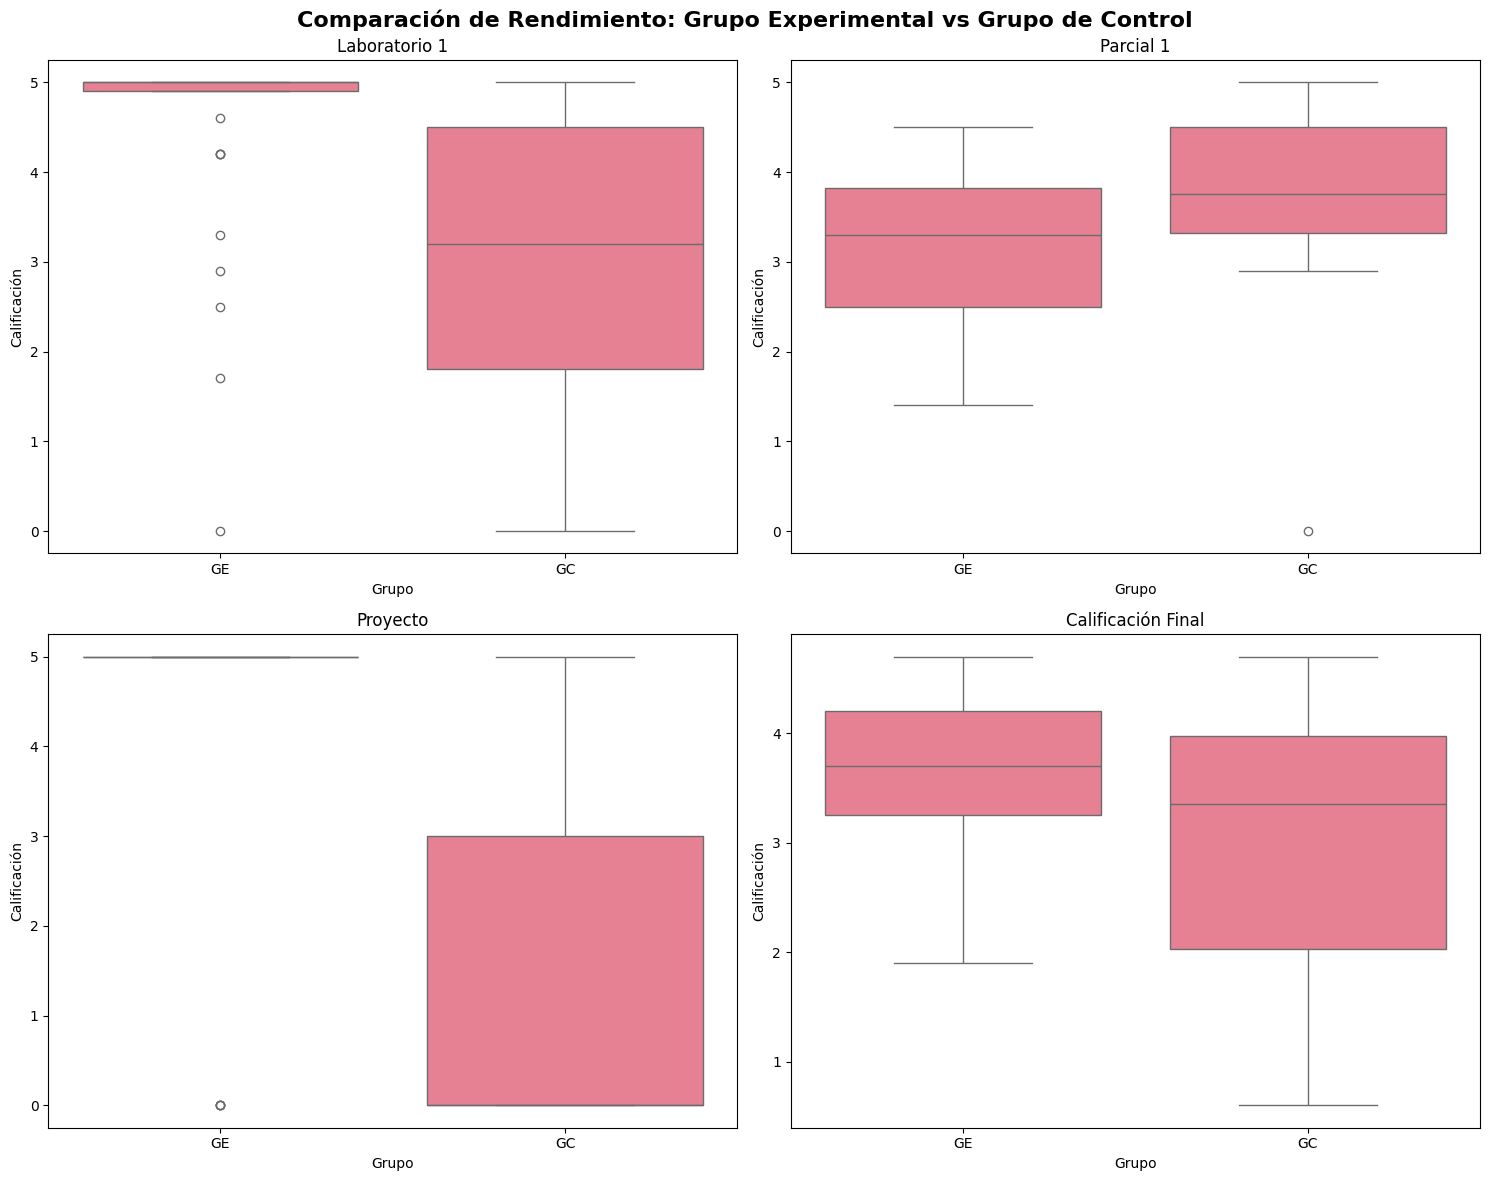

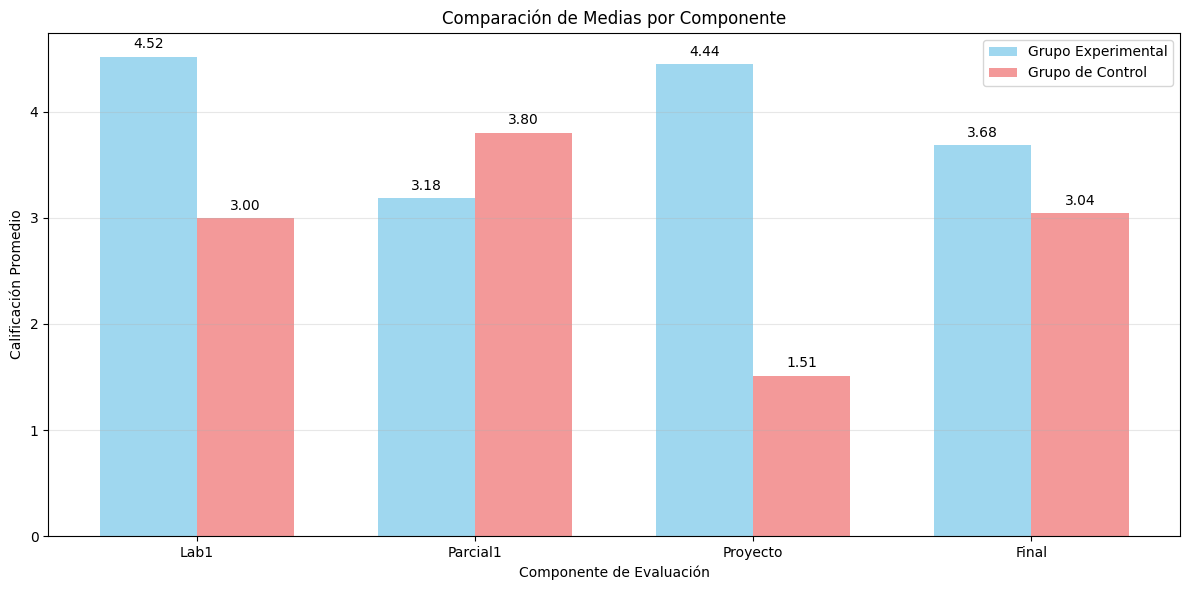

Las visualizaciones muestran claramente las diferencias entre grupos en cada componente.


In [85]:
# Configuración de visualizaciones
import seaborn as sns
plt.style.use('default')
sns.set_palette("husl")

# Crear un DataFrame combinado para facilitar las visualizaciones
data_combined = pd.DataFrame({
    'Lab1': pd.concat([data_GE['Lab1-GE'], data_GC['Lab1-GC']]),
    'Parcial1': pd.concat([data_GE['Parcial1-GE'], data_GC['Parcial1-GC']]),
    'Proyecto': pd.concat([data_GE['Proyecto-GE'], data_GC['Proyecto-GC']]),
    'Final': pd.concat([data_GE['Final-Estudiante-GE'], data_GC['Final-Estudiante-GC']]),
    'Grupo': ['GE']*len(data_GE) + ['GC']*len(data_GC)
})

# Configurar la figura con múltiples subgráficos
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Comparación de Rendimiento: Grupo Experimental vs Grupo de Control', 
             fontsize=16, fontweight='bold')

# Gráfico 1: Laboratorio 1
sns.boxplot(data=data_combined, x='Grupo', y='Lab1', ax=axes[0,0])
axes[0,0].set_title('Laboratorio 1')
axes[0,0].set_ylabel('Calificación')

# Gráfico 2: Parcial 1
sns.boxplot(data=data_combined, x='Grupo', y='Parcial1', ax=axes[0,1])
axes[0,1].set_title('Parcial 1')
axes[0,1].set_ylabel('Calificación')

# Gráfico 3: Proyecto
sns.boxplot(data=data_combined, x='Grupo', y='Proyecto', ax=axes[1,0])
axes[1,0].set_title('Proyecto')
axes[1,0].set_ylabel('Calificación')

# Gráfico 4: Calificación Final
sns.boxplot(data=data_combined, x='Grupo', y='Final', ax=axes[1,1])
axes[1,1].set_title('Calificación Final')
axes[1,1].set_ylabel('Calificación')

plt.tight_layout()
plt.show()

# Gráfico de barras con medias
plt.figure(figsize=(12, 6))
medias = {
    'Lab1': [data_GE['Lab1-GE'].mean(), data_GC['Lab1-GC'].mean()],
    'Parcial1': [data_GE['Parcial1-GE'].mean(), data_GC['Parcial1-GC'].mean()],
    'Proyecto': [data_GE['Proyecto-GE'].mean(), data_GC['Proyecto-GC'].mean()],
    'Final': [data_GE['Final-Estudiante-GE'].mean(), data_GC['Final-Estudiante-GC'].mean()]
}

x = np.arange(len(medias))
width = 0.35

plt.bar(x - width/2, [medias[comp][0] for comp in medias], width, 
        label='Grupo Experimental', alpha=0.8, color='skyblue')
plt.bar(x + width/2, [medias[comp][1] for comp in medias], width, 
        label='Grupo de Control', alpha=0.8, color='lightcoral')

plt.xlabel('Componente de Evaluación')
plt.ylabel('Calificación Promedio')
plt.title('Comparación de Medias por Componente')
plt.xticks(x, list(medias.keys()))
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for i, comp in enumerate(medias):
    plt.text(i - width/2, medias[comp][0] + 0.05, f'{medias[comp][0]:.2f}', 
             ha='center', va='bottom')
    plt.text(i + width/2, medias[comp][1] + 0.05, f'{medias[comp][1]:.2f}', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("Las visualizaciones muestran claramente las diferencias entre grupos en cada componente.")

---

### 12. Resumen Ejecutivo y Recomendaciones

#### Tabla de Resultados de las Pruebas Mann-Whitney

| Componente | Estadístico U | Valor p | Decisión | Favorece a |
|------------|---------------|---------|----------|------------|
| Laboratorio 1 | 883.5 | < 0.001 | Se rechaza H₀ | **Grupo Experimental** |
| Parcial 1 | 297.0 | 0.002 | Se rechaza H₀ | **Grupo de Control** |
| Proyecto | 914.0 | < 0.001 | Se rechaza H₀ | **Grupo Experimental** |
| Calificación Final | 690.5 | 0.053 | No se rechaza H₀ | Diferencia no significativa |

#### Síntesis de Hallazgos Principales

**1. Efectividad Diferenciada del Tratamiento:**
- El tratamiento experimental muestra efectividad significativa en **actividades prácticas** (laboratorios y proyectos)
- Menor efectividad en **evaluaciones tradicionales** (parciales teóricos)
- El efecto general en la calificación final es marginalmente no significativo (p = 0.053)

**2. Magnitud de los Efectos:**
- **Laboratorio 1**: Diferencia muy grande a favor del GE (Δmedia = 1.52 puntos, 50.7% mejora)
- **Proyecto**: Diferencia extrema a favor del GE (Δmedia = 2.93 puntos, 194% mejora)
- **Parcial 1**: Diferencia moderada a favor del GC (Δmedia = -0.62 puntos)

**3. Implicaciones Pedagógicas:**
- El tratamiento experimental favorece el **aprendizaje aplicado** y las **competencias prácticas**
- Necesidad de fortalecer componentes teóricos en el enfoque experimental
- Evidencia de desarrollo de competencias de nivel superior (aplicación, síntesis, evaluación)

#### Recomendaciones para la Implementación

**Recomendaciones Inmediatas:**
1. **Adoptar el tratamiento experimental** como metodología principal para el curso
2. **Integrar componentes teóricos** dentro del enfoque práctico experimental
3. **Reevaluar las estrategias de evaluación** para equilibrar teoría y práctica
4. **Desarrollar módulos de refuerzo teórico** específicos para estudiantes del grupo experimental

**Recomendaciones de Investigación:**
1. Realizar seguimiento longitudinal del rendimiento de los estudiantes
2. Investigar estrategias específicas para mejorar rendimiento en evaluaciones teóricas
3. Evaluar la retención de conocimientos a largo plazo entre ambos grupos
4. Estudiar la transferencia de competencias a cursos avanzados

#### Limitaciones del Estudio

- **Tamaño de muestra**: Grupos relativamente pequeños (36 GE, 30 GC)
- **Duración**: Análisis limitado a un período académico
- **Variables confusoras**: No se controlaron factores como experiencia previa, motivación inicial, etc.
- **Generalización**: Resultados específicos para el curso de Fundamentos de Programación

#### Conclusión Final

El análisis de estadística no paramétrica mediante las pruebas de Mann-Whitney proporciona **evidencia sólida** de que el tratamiento experimental tiene efectos **positivos y significativos** en el desarrollo de competencias prácticas y aplicadas. Sin embargo, los resultados también revelan la necesidad de **equilibrar el enfoque** para optimizar tanto el aprendizaje práctico como el dominio de conceptos teóricos fundamentales.

La implementación del tratamiento experimental se recomienda con **ajustes específicos** para fortalecer los componentes teóricos, lo que permitiría maximizar los beneficios observados mientras se mitigan las debilidades identificadas.